In [1]:
import pandas as pd

# Load data
df = pd.read_csv('final_internship_data.csv')

# Drop unnecessary columns
cols_to_drop = ['User ID', 'User Name', 'Driver Name', 'key', 'pickup_datetime']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

# Drop null values
df.dropna(inplace=True)

df.head()


,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,Very Good,windy,Congested Traffic,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,Excellent,cloudy,Flow Traffic,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,Bad,stormy,Congested Traffic,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,Very Good,stormy,Flow Traffic,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,Bad,stormy,Congested Traffic,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


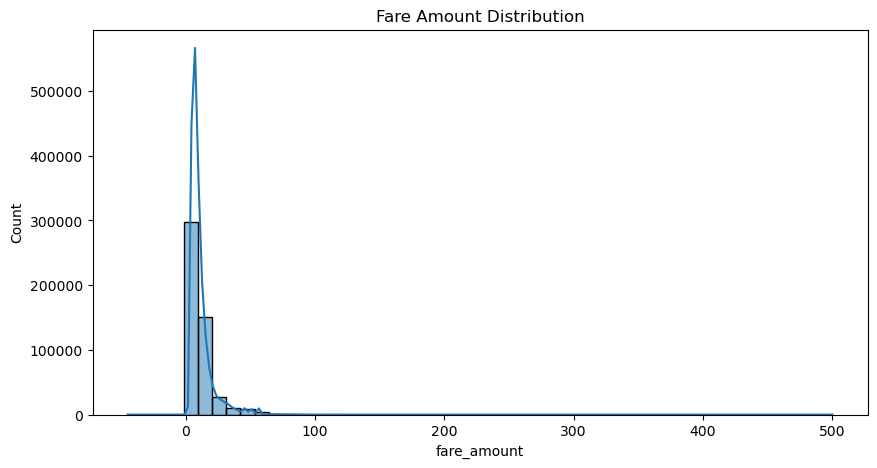

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title('Fare Amount Distribution')
plt.show()


In [3]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['fare_amount'] >= Q1 - 1.5 * IQR) & (df['fare_amount'] <= Q3 + 1.5 * IQR)]


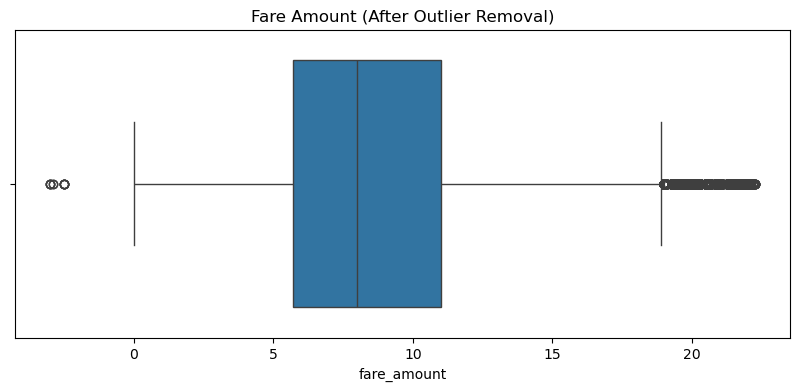

In [4]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['fare_amount'])
plt.title('Fare Amount (After Outlier Removal)')
plt.show()


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
df.head()


,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,3,4,0,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,1,0,2,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,0,2,0,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,3,2,2,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,0,2,0,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [6]:
import numpy as np

corr = df.drop(columns='fare_amount').corr()

# Drop highly correlated features
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df.drop(columns=to_drop, inplace=True)


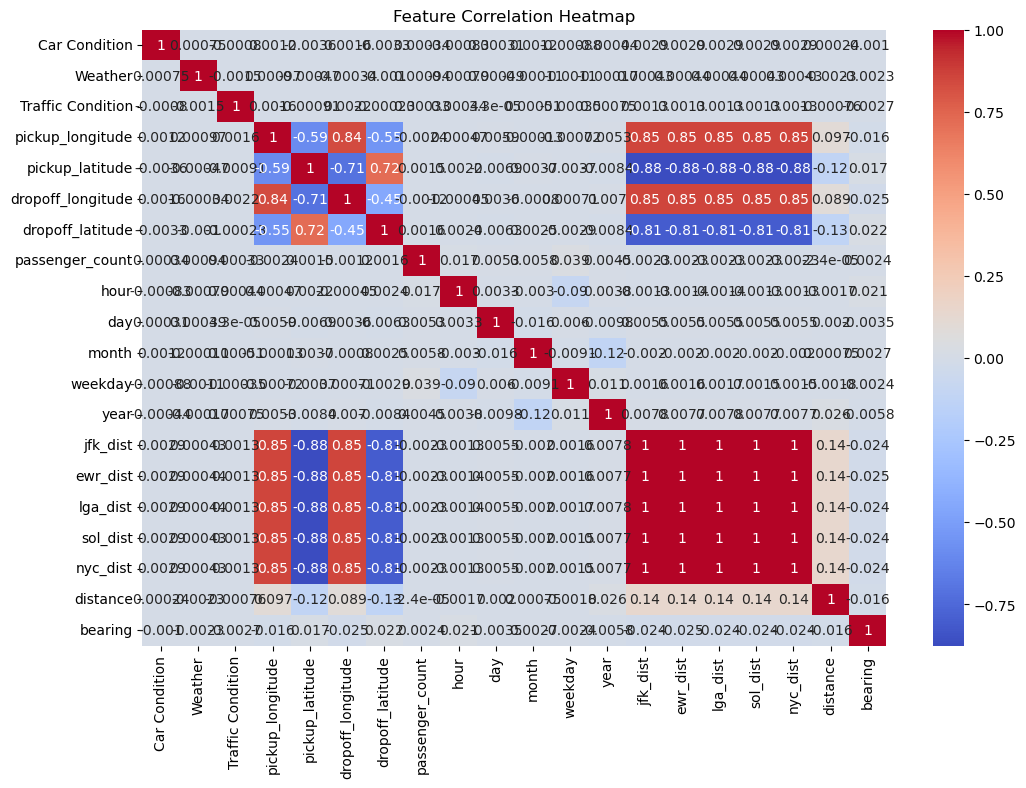

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [8]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop(columns='fare_amount')
y = df['fare_amount']

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


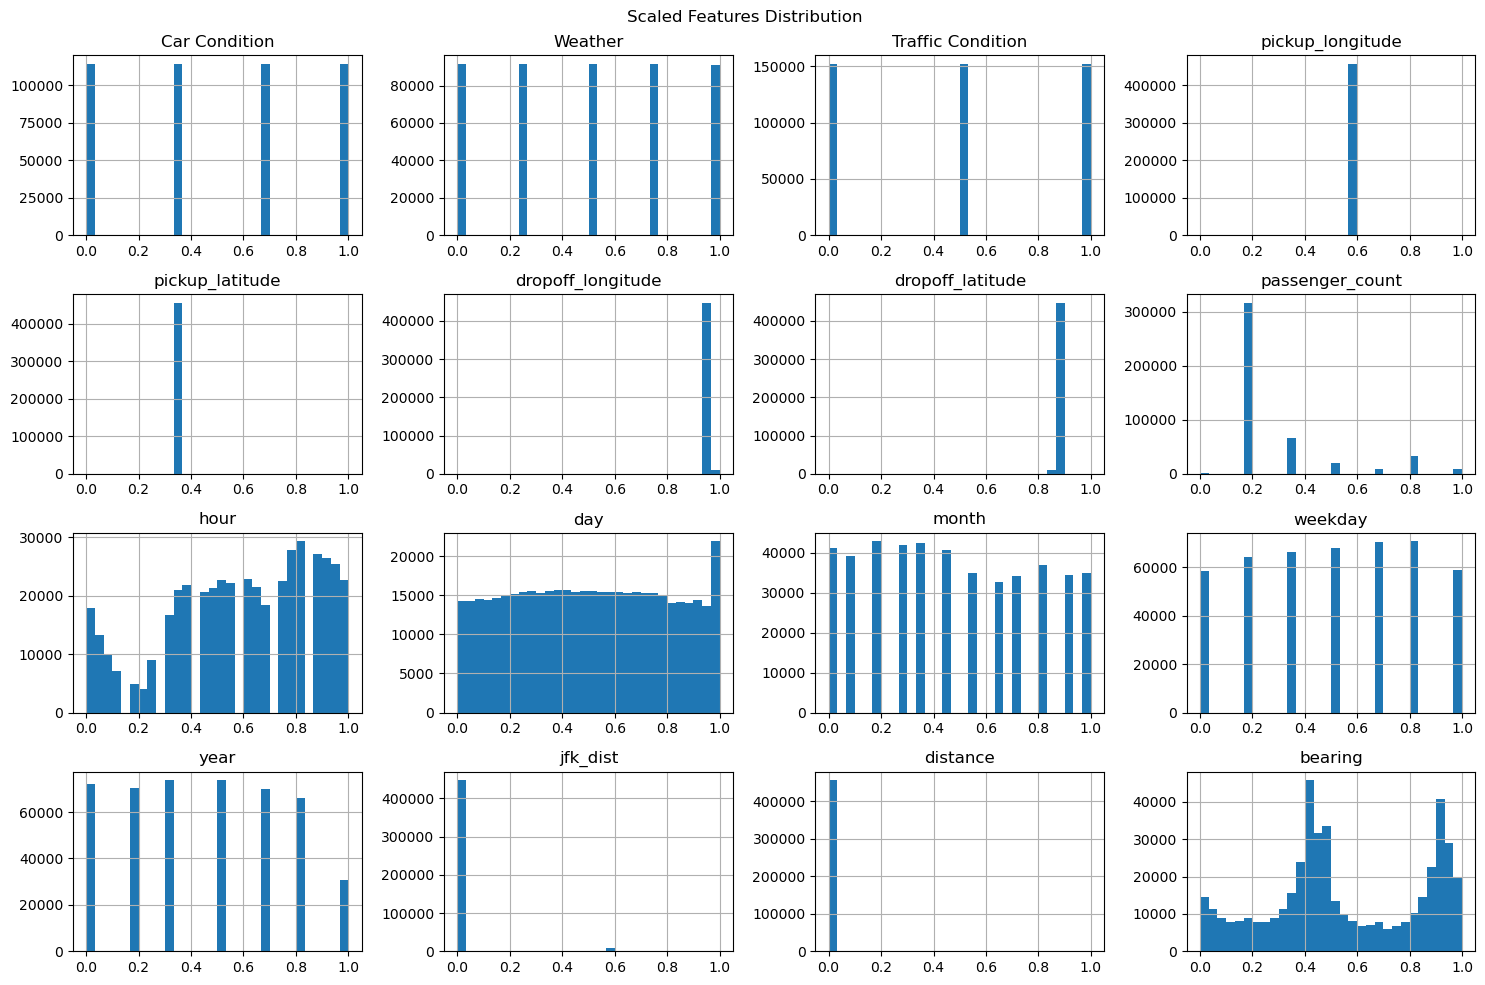

In [9]:
X_scaled.hist(figsize=(15, 10), bins=30)
plt.suptitle("Scaled Features Distribution")
plt.tight_layout()
plt.show()


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, root_mean_squared_error


In [12]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']


In [13]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Linear Regression - R2 Score: 0.0231, RMSE: 4.0794
Decision Tree - R2 Score: 0.5353, RMSE: 2.8136
Random Forest - R2 Score: 0.7841, RMSE: 1.9180


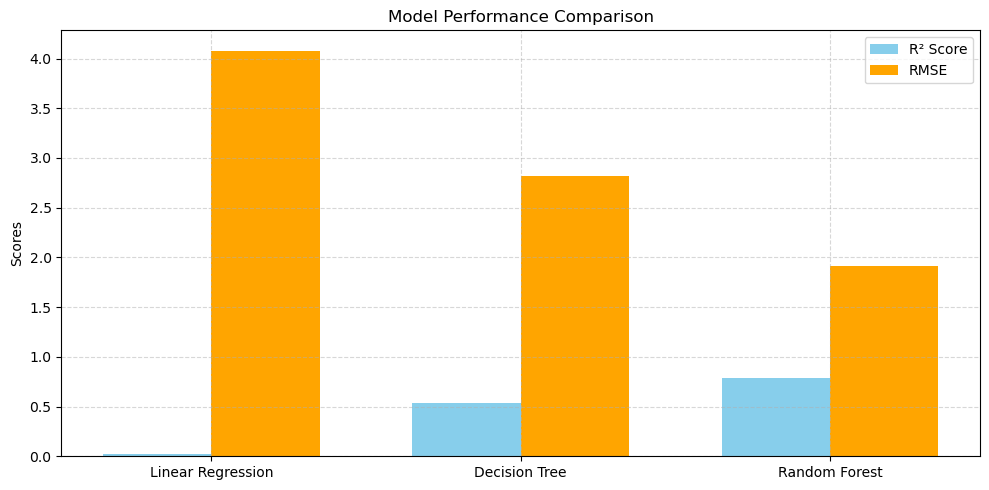

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, root_mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Store results
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = root_mean_squared_error(y_test, preds)
    results[name] = {'R2': r2, 'RMSE': rmse}

# Display results
for model_name, scores in results.items():
    print(f"{model_name} - R2 Score: {scores['R2']:.4f}, RMSE: {scores['RMSE']:.4f}")

# Visualization: Bar chart of R² and RMSE
labels = list(results.keys())
r2_values = [results[model]['R2'] for model in labels]
rmse_values = [results[model]['RMSE'] for model in labels]

x = np.arange(len(labels))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 5))
bar1 = ax1.bar(x - width/2, r2_values, width, label='R² Score', color='skyblue')
bar2 = ax1.bar(x + width/2, rmse_values, width, label='RMSE', color='orange')

ax1.set_ylabel('Scores')
ax1.set_title('Model Performance Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, root_mean_squared_error
import scipy.stats as st
import numpy as np

# Search space
param_dist = {
    "n_estimators": st.randint(100, 600),       # number of trees
    "max_depth": st.randint(5, 30),             # tree depth
    "min_samples_split": st.randint(2, 10),     # min samples to split
    "min_samples_leaf": st.randint(1, 8),       # min samples at leaf
    "max_features": ["sqrt", "log2", 0.5, None] # feature sampling
}

rf_base = RandomForestRegressor(random_state=42)

search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=10,             # try 30 random combos
    cv=2,
    scoring="r2",
    n_jobs=-1,
    verbose=1,
    random_state=42
)
search.fit(X_train, y_train)

print("Best R² (CV):", search.best_score_)
print("Best parameters:", search.best_params_)
best_rf = search.best_estimator_


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best R² (CV): 0.7821319399246422
Best parameters: {'max_depth': 23, 'max_features': 0.5, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 187}


In [16]:
y_pred_best = best_rf.predict(X_test)
test_r2  = r2_score(y_test, y_pred_best)
test_rmse = root_mean_squared_error(y_test, y_pred_best)

print(f"Tuned Random Forest – R²: {test_r2:.4f}, RMSE: {test_rmse:.4f}")


Tuned Random Forest – R²: 0.7902, RMSE: 1.8903


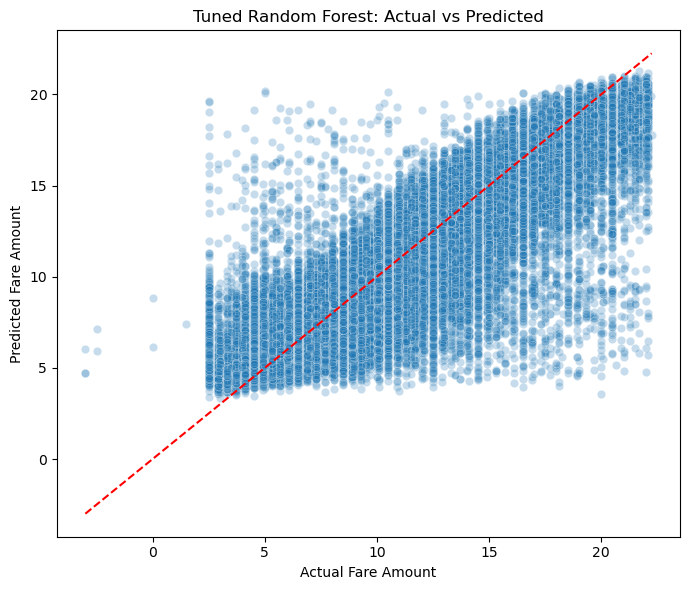

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.25)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount")
plt.title("Tuned Random Forest: Actual vs Predicted")
plt.tight_layout()
plt.show()


C:\Users\JOE TECH\AppData\Local\Temp\ipykernel_5240\4058033052.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")


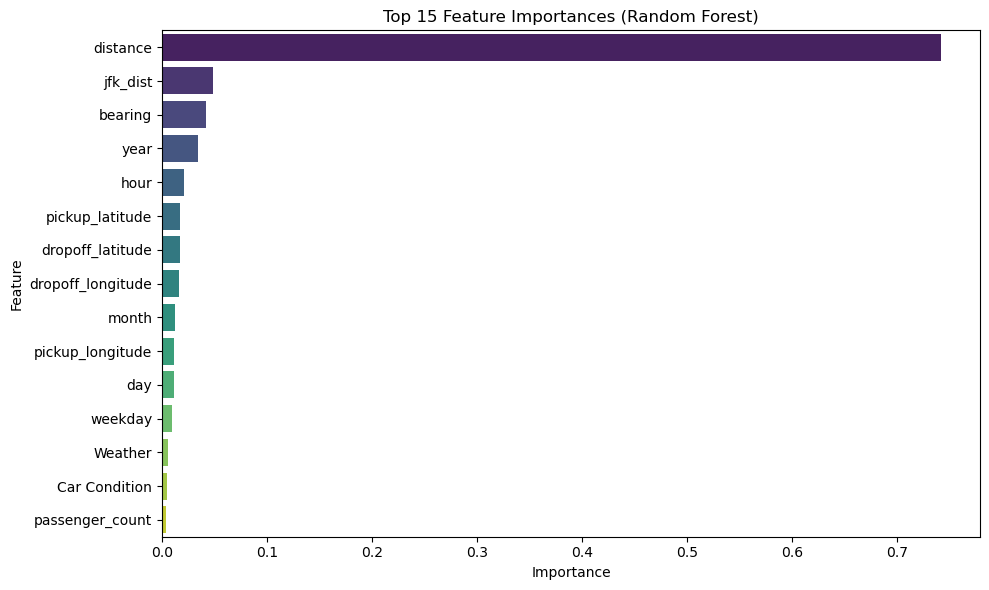

In [18]:
import pandas as pd

importances = best_rf.feature_importances_
feat_imp = pd.Series(importances, index=df.drop("fare_amount", axis=1).columns)
feat_imp = feat_imp.sort_values(ascending=False).head(15)   # top 15 features

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [19]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [20]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as st
import numpy as np

# Define hyperparameter space
xgb_param_dist = {
    "n_estimators": st.randint(50, 200),
    "max_depth": st.randint(3, 10),
    "learning_rate": st.uniform(0.01, 0.2),
    "subsample": st.uniform(0.6, 0.4),
    "colsample_bytree": st.uniform(0.6, 0.4)
}

# Base model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Randomized search
xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_dist,
    n_iter=10,      # reduce for faster training
    cv=2,           # reduce CV folds
    scoring="r2",
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit search
xgb_search.fit(X_train, y_train)

# Best model
best_xgb = xgb_search.best_estimator_

# Evaluate on test set
y_pred = best_xgb.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"XGBoost Test R²: {r2:.4f}")
print(f"XGBoost Test RMSE: {rmse:.4f}")
print("Best Params:", xgb_search.best_params_)


Fitting 2 folds for each of 10 candidates, totalling 20 fits
XGBoost Test R²: 0.7953
XGBoost Test RMSE: 1.8672
Best Params: {'colsample_bytree': 0.9140703845572055, 'learning_rate': 0.04993475643167195, 'max_depth': 9, 'n_estimators': 113, 'subsample': 0.786705157299192}


C:\Users\JOE TECH\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


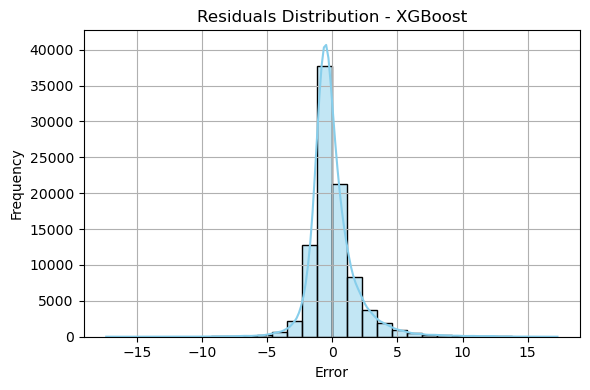

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True, color='skyblue')
plt.title("Residuals Distribution - XGBoost")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


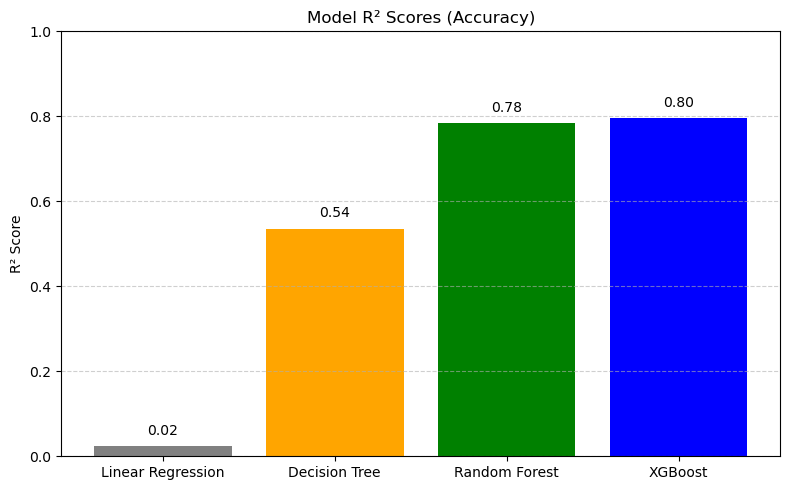

In [22]:
import matplotlib.pyplot as plt

# Example results dictionary (use yours if different)
results = {
    'Linear Regression': {'R2': 0.0231},
    'Decision Tree': {'R2': 0.5353},
    'Random Forest': {'R2': 0.7841},
    'XGBoost': {'R2': r2}  # replace with the actual R² score from XGBoost
}

# Extract model names and scores
model_names = list(results.keys())
r2_scores = [results[model]['R2'] for model in model_names]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, r2_scores, color=['gray', 'orange', 'green', 'blue'])
plt.title("Model R² Scores (Accuracy)")
plt.ylabel("R² Score")
plt.ylim(0, 1)  # since R² ranges between 0 and 1

# Annotate bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [23]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
gbr_preds = gbr.predict(X_test)

gbr_r2 = r2_score(y_test, gbr_preds)
gbr_rmse = root_mean_squared_error(y_test, gbr_preds)

print("Gradient Boosting - R² Score:", round(gbr_r2, 4), "RMSE:", round(gbr_rmse, 4))

# Add to results dictionary if you want to plot later
results["Gradient Boosting"] = {"R2": gbr_r2, "RMSE": gbr_rmse}


Gradient Boosting - R² Score: 0.5534 RMSE: 2.7582


In [24]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

xgb_r2 = r2_score(y_test, xgb_preds)
xgb_rmse = root_mean_squared_error(y_test, xgb_preds)

print("XGBoost - R² Score:", round(xgb_r2, 4), "RMSE:", round(xgb_rmse, 4))
results["XGBoost"] = {"R2": xgb_r2, "RMSE": xgb_rmse}


XGBoost - R² Score: 0.7978 RMSE: 1.8561


In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

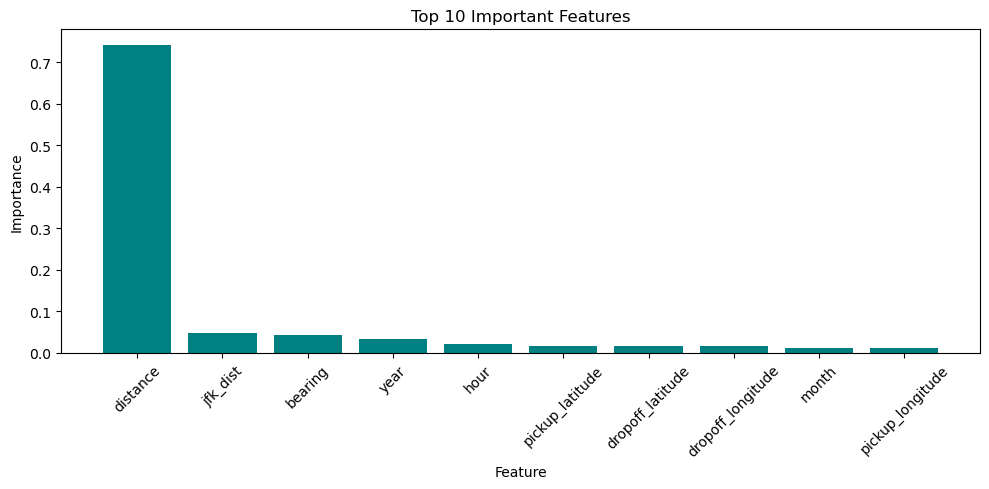

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Reuse the original feature names from the DataFrame (before scaling)
feat_names = df.drop("fare_amount", axis=1).columns

# Use the best model you trained (e.g., search.best_estimator_)
importances = search.best_estimator_.feature_importances_

# Create DataFrame for plotting
imp_df = pd.DataFrame({"Feature": feat_names, "Importance": importances})
imp_df = imp_df.sort_values(by="Importance", ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 5))
plt.bar(imp_df["Feature"][:10], imp_df["Importance"][:10], color='teal')
plt.title("Top 10 Important Features")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, scoring="r2", cv=3, n_jobs=-1)
grid.fit(X_train, y_train)
print("Best R²:", grid.best_score_)
print("Best params:", grid.best_params_)


Best R²: 0.6917869329129475
Best params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [28]:
from sklearn.ensemble import StackingRegressor

stack = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(n_estimators=100)),
        ('gb', GradientBoostingRegressor(n_estimators=100)),
        ('xgb', xgb.XGBRegressor())
    ],
    final_estimator=LinearRegression()
)

stack.fit(X_train, y_train)
stack_preds = stack.predict(X_test)

print("Stacked Model R²:", r2_score(y_test, stack_preds))


Stacked Model R²: 0.8002863177195725


In [30]:
# Step 1: Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Define and train models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=100)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    results[name] = {"R2": r2, "RMSE": rmse}
    print(f"{name} - R2 Score: {r2:.4f}, RMSE: {rmse:.4f}")


Linear Regression - R2 Score: 0.0231, RMSE: 4.0794
Decision Tree - R2 Score: 0.5353, RMSE: 2.8136
Random Forest - R2 Score: 0.7841, RMSE: 1.9180
XGBoost - R2 Score: 0.7978, RMSE: 1.8561


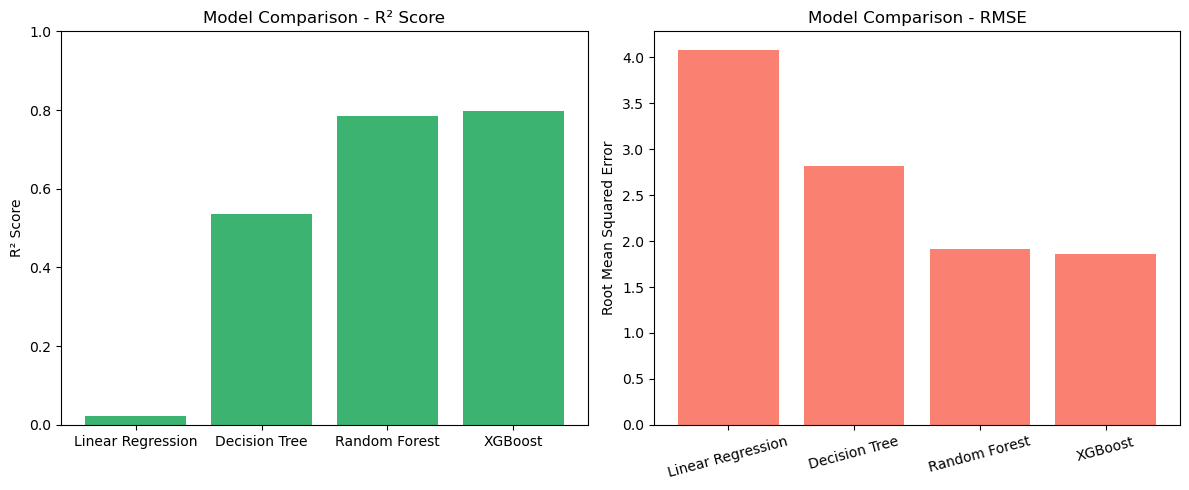

In [31]:
# Plot R² and RMSE for all models
model_names = list(results.keys())
r2_scores = [results[m]['R2'] for m in model_names]
rmses = [results[m]['RMSE'] for m in model_names]

plt.figure(figsize=(12, 5))

# R2 Score Plot
plt.subplot(1, 2, 1)
plt.bar(model_names, r2_scores, color='mediumseagreen')
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")
plt.ylim(0, 1)

# RMSE Plot
plt.subplot(1, 2, 2)
plt.bar(model_names, rmses, color='salmon')
plt.title("Model Comparison - RMSE")
plt.ylabel("Root Mean Squared Error")

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
